In [1]:
from platform import python_version
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
print('Python version:', python_version())

%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Python version: 3.10.4
Author: Data Science Academy

seaborn   : 0.11.2
pandas    : 1.4.3
numpy     : 1.23.0
matplotlib: 3.5.2
sys       : 3.10.4 | packaged by conda-forge | (main, Mar 30 2022, 08:38:02) [MSC v.1916 64 bit (AMD64)]



# Loading dataframe

In [3]:
df = pd.read_csv("dataset/cars.csv")
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


## Previous inspections

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


## Target analysis

In [5]:
df['MSRP'] = df['MSRP'].map(lambda x: x.lstrip('$').replace(',',''))
df['MSRP'] = pd.to_numeric(df['MSRP'])

df = df.drop(columns=['Invoice'])

df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,3.5,6.0,225,18,24,3880,115,197


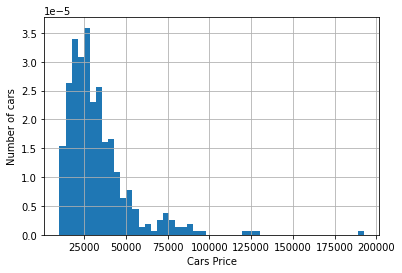

In [6]:
# histogran to evaluate target distribution
df['MSRP'].hist(bins=50, density=True)
plt.ylabel('Number of cars')
plt.xlabel('Cars Price')
plt.show()

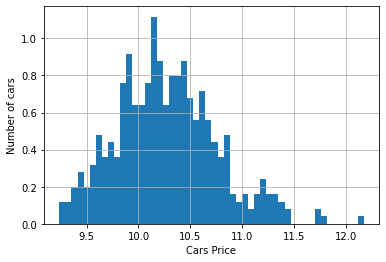

In [7]:
# histogran to evaluate target distribution
np.log(df['MSRP']).hist(bins=50, density=True)
plt.ylabel('Number of cars')
plt.xlabel('Cars Price')
plt.show()

Now the distribution looks more gaussian.

# Variable types

In [30]:
cat_vars = [var for var in df.columns if df[var].dtype == 'O']
cat_vars

['Make', 'Model', 'Type', 'Origin', 'DriveTrain']

In [9]:
# now let's identify the numerical variables
num_vars = [
    var for var in df.columns if var not in cat_vars and var != 'MSRP'
]
num_vars

['EngineSize',
 'Cylinders',
 'Horsepower',
 'MPG_City',
 'MPG_Highway',
 'Weight',
 'Wheelbase',
 'Length']

# Missing values

In [10]:
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]
df[vars_with_na].isnull().sum().sort_values(ascending=False)

Cylinders    2
dtype: int64

We have just one variable with missing value "Cylinders", and this variable have just 2 rown missing. We can add a mean of cylinder grouped by "Type".

In [11]:
for index, type in zip(df[df['Cylinders'].isnull()]['Type'].index, df[df['Cylinders'].isnull()]['Type']):
    cylinder = round(df.groupby(['Type'])['Cylinders'].mean().loc[type], 0)
    print(index, type, cylinder)
    df.loc[index, 'Cylinders'] = cylinder

df[vars_with_na].isnull().sum().sort_values(ascending=False)

247 Sports 6.0
248 Sports 6.0


Cylinders    0
dtype: int64

# Numerical variables

In [12]:
print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
df[num_vars].head()

Number of numerical variables:  8


,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,3.5,6.0,265,17,23,4451,106,189
1,2.0,4.0,200,24,31,2778,101,172
2,2.4,4.0,200,22,29,3230,105,183
3,3.2,6.0,270,20,28,3575,108,186
4,3.5,6.0,225,18,24,3880,115,197


# Discrete variables

In [13]:
#  let's male a list of discrete variables
discrete_vars = [var for var in num_vars if len(df[var].unique()) < 20]

print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  1


In [14]:
# let's visualise the discrete variables
df[discrete_vars].head()

,Cylinders
0,6.0
1,4.0
2,4.0
3,6.0
4,6.0


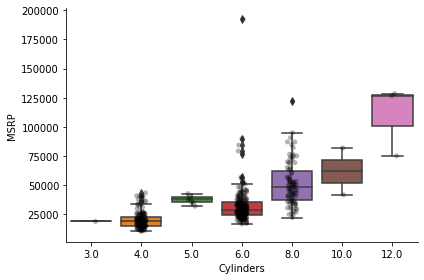

In [15]:
for var in discrete_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y='MSRP', data=df, kind="box", height=4, aspect=1.5)
    sns.stripplot(x=var, y='MSRP', data=df, jitter=0.1, alpha=0.3, color='k')
    plt.show()

# Continuous variables

In [16]:
cont_vars = [var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))

df[cont_vars].head()

Number of continuous variables:  7


,EngineSize,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,3.5,265,17,23,4451,106,189
1,2.0,200,24,31,2778,101,172
2,2.4,200,22,29,3230,105,183
3,3.2,270,20,28,3575,108,186
4,3.5,225,18,24,3880,115,197


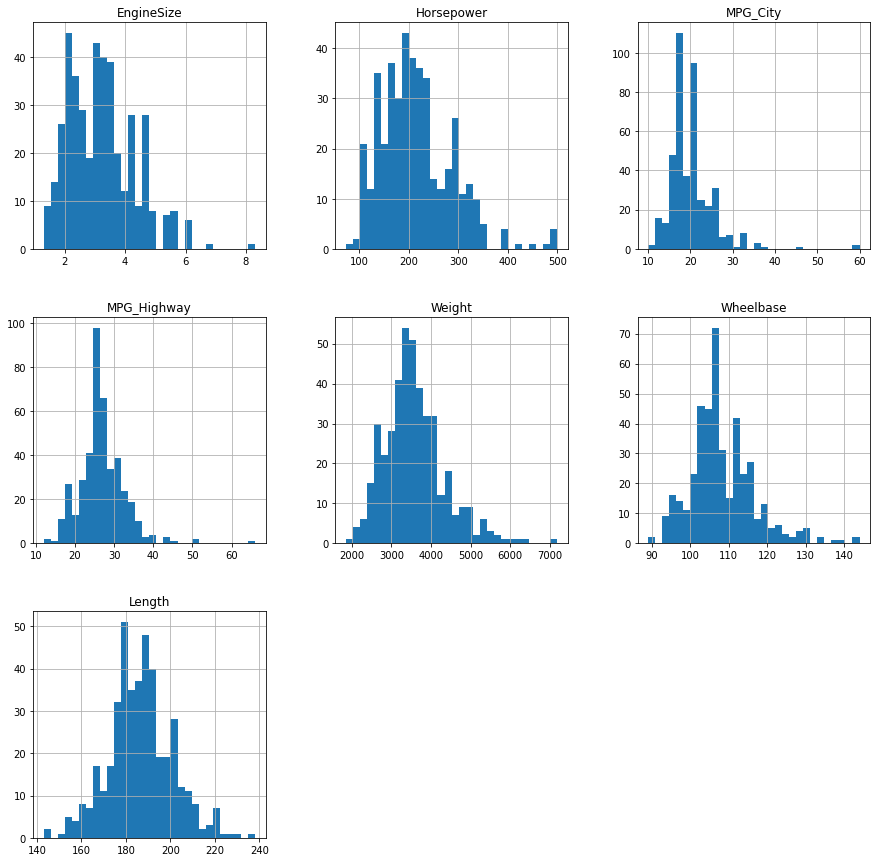

In [17]:
# lets plot histograms for all continuous variables
df[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

# Categorical variables

In [18]:
print('Number of categorical variables: ', len(cat_vars))

df[cat_vars].head()

Number of categorical variables:  5


,Make,Model,Type,Origin,DriveTrain
0,Acura,MDX,SUV,Asia,All
1,Acura,RSX Type S 2dr,Sedan,Asia,Front
2,Acura,TSX 4dr,Sedan,Asia,Front
3,Acura,TL 4dr,Sedan,Asia,Front
4,Acura,3.5 RL 4dr,Sedan,Asia,Front


## Number of labels: cardinality

<AxesSubplot:>

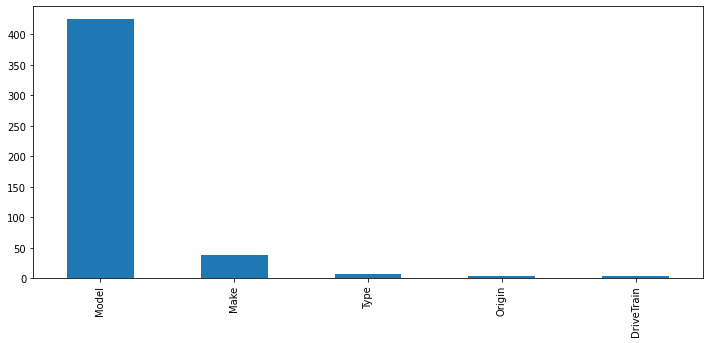

In [19]:
df[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [31]:
cat_vars.remove('Model')
# cat_vars.remove('Make')

<AxesSubplot:>

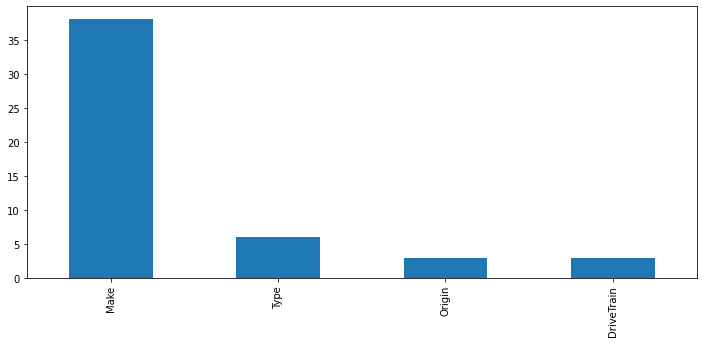

In [32]:
df[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

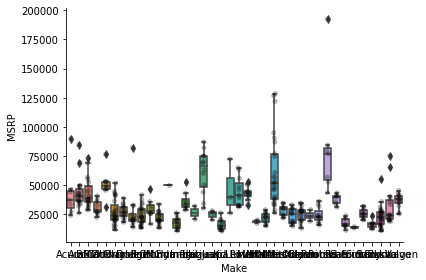

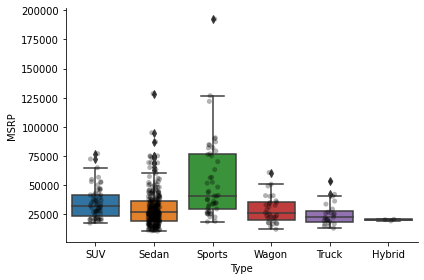

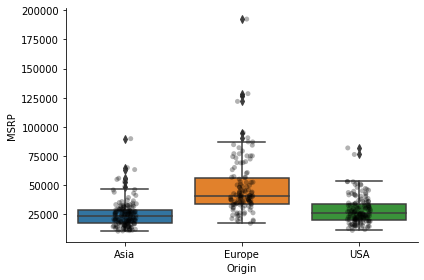

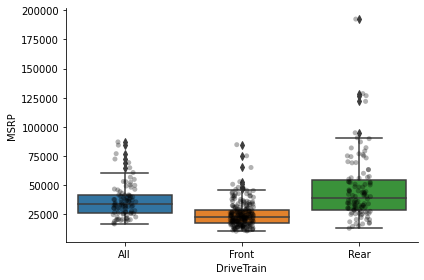

In [33]:
for var in cat_vars:
    sns.catplot(x=var, y='MSRP', data=df, kind="box", height=4, aspect=1.5)
    sns.stripplot(x=var, y='MSRP', data=df, jitter=0.1, alpha=0.3, color='k')
    plt.show()